In [23]:
from src.model_defs import mnist_cnn_4layer
from auto_LiRPA import BoundedModule, BoundedTensor
import torch
import torchvision
from autoattack import AutoAttack
import random
from src.attack_pgd import attack_pgd

In [24]:
device="cuda"

In [25]:
adv_data = torch.load("madrycnn_diversity_pgd.torch")
adv_data.shape

torch.Size([100, 100, 28, 28])

In [26]:
relus = []
for m in model.modules():
    if isinstance(m, torch.nn.ReLU):
        relus.append([None,None,None])

In [27]:
N = 100
for n in range(N):
    x_adv = adv_data[n].unsqueeze(1)
    x_adv.to(device)

    x = x_adv
    
    relu_idx = 0
    for module in model.children():
        if isinstance(module, torch.nn.ReLU):
            if relus[relu_idx][0] is None:
                relus[relu_idx] = [torch.zeros_like(x_adv.flatten()), torch.zeros_like(x_adv.flatten()), torch.zeros_like(x_adv.flatten())]
            relus[relu_idx][0] += x_adv.flatten() > 0
            relus[relu_idx][1] += x_adv.flatten() == 0
            relus[relu_idx][2] += x_adv.flatten() < 0

            relu_idx += 1
        x_adv = module(x_adv)

    

In [28]:
import matplotlib.pyplot as plt

In [29]:

for i in range(len(relus)):
    relu_sum = sum(relus[i])+3
    relus[i] = [list(((r+1)/relu_sum).detach().cpu().numpy()) for r in relus[i]]

In [30]:
import numpy as np

(array([124436.,  26268.,  14220.,   8954.,   7316.,   6978.,  10185.,
         12488.,  17229.,  85526.]),
 array([0.00970874, 0.10679612, 0.2038835 , 0.30097088, 0.39805827,
        0.49514565, 0.592233  , 0.6893204 , 0.78640777, 0.88349515,
        0.98058254], dtype=float32),
 <BarContainer object of 10 artists>)

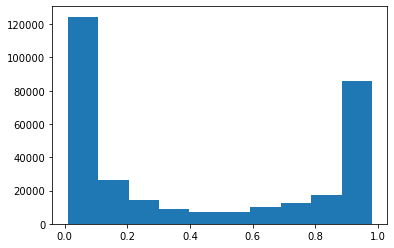

In [35]:
plt.hist(relus[0][0])